In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
#Reading the csv file and check for correlation scores
data1=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# check missing values
data1.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#check data types
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


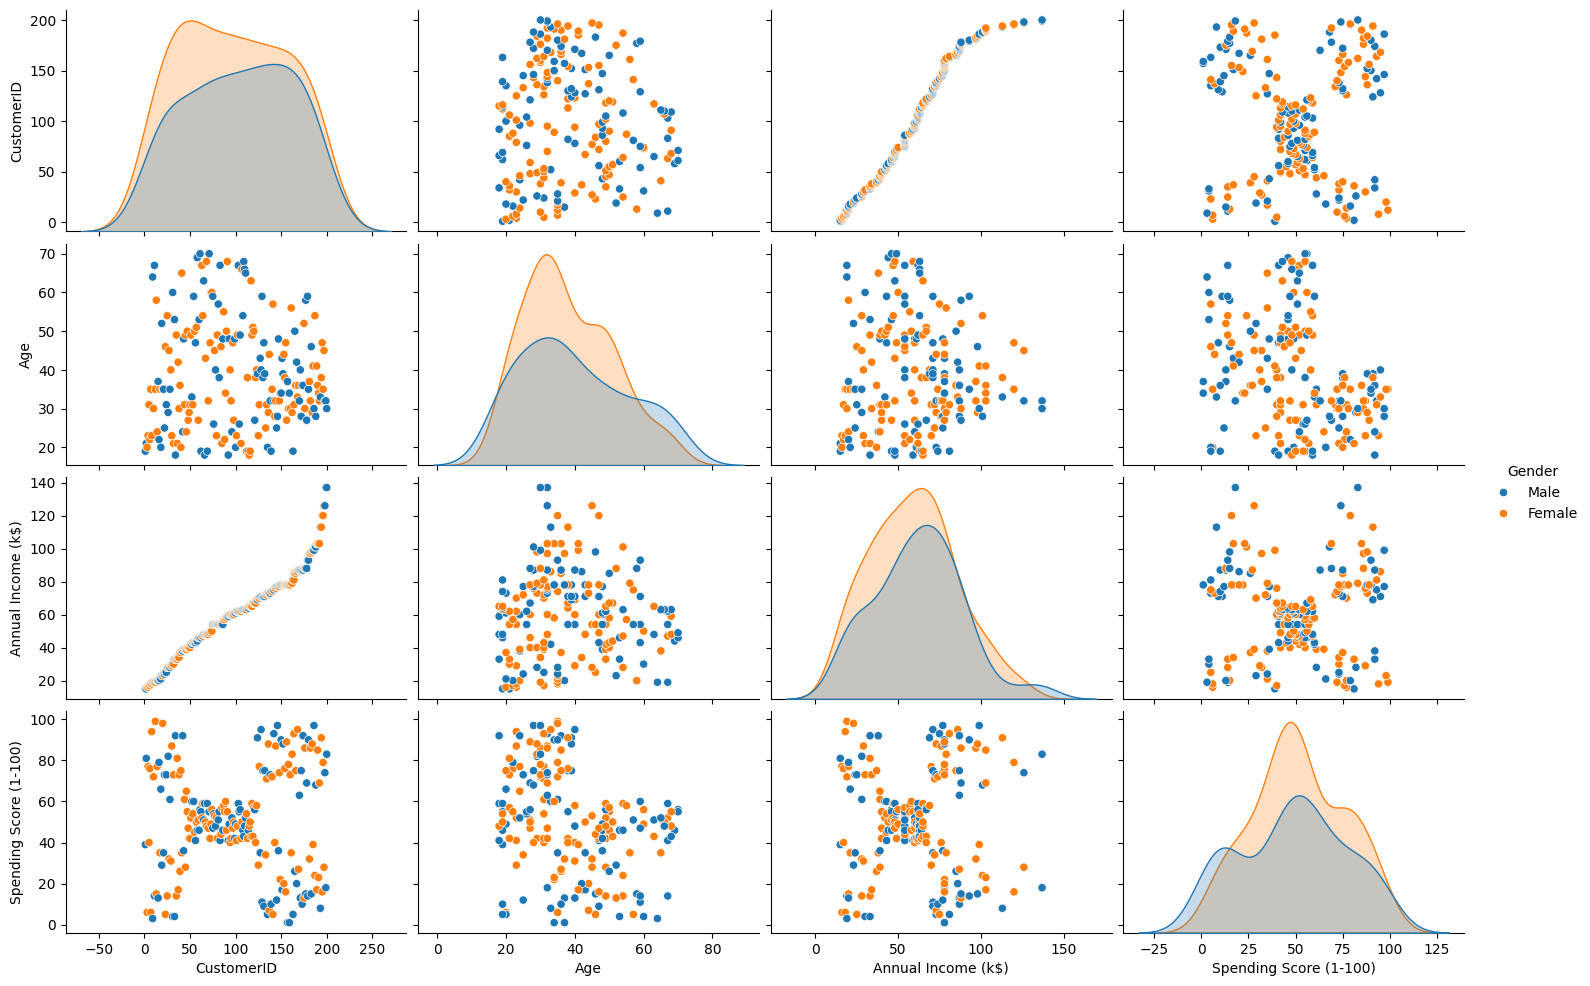

In [ ]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data1, hue='Gender', aspect=1.5)
plt.show()

<ipython-input-7-dd793fc120d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), cmap = 'Wistia', annot = True)


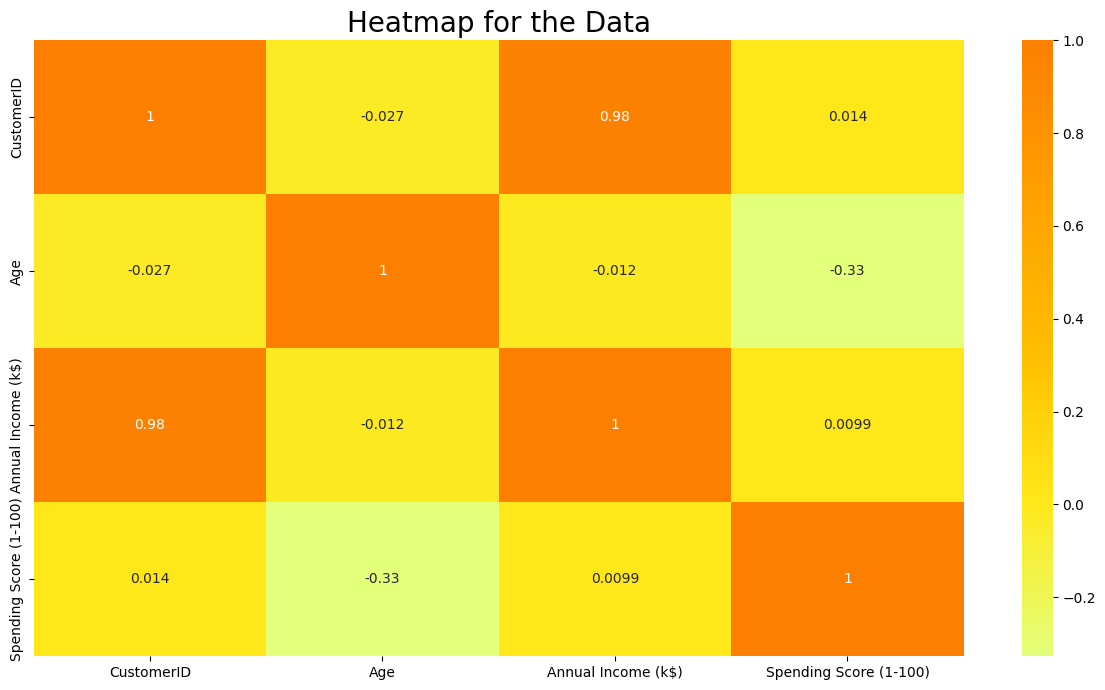

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data1.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Text(0, 0.5, 'Count')

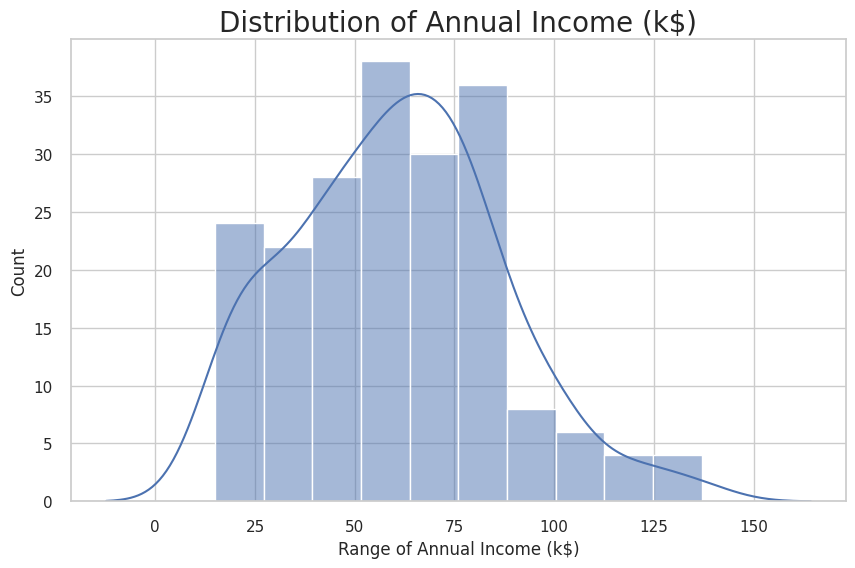

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(data1['Annual Income (k$)'],kde=True, kde_kws=dict(cut=3))
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

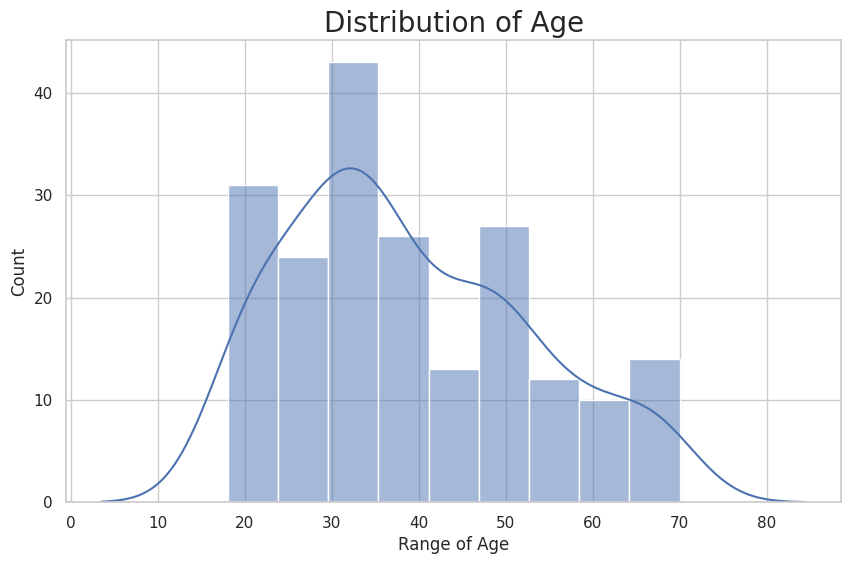

In [ ]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(data1['Age'],kde=True, kde_kws=dict(cut=3))
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

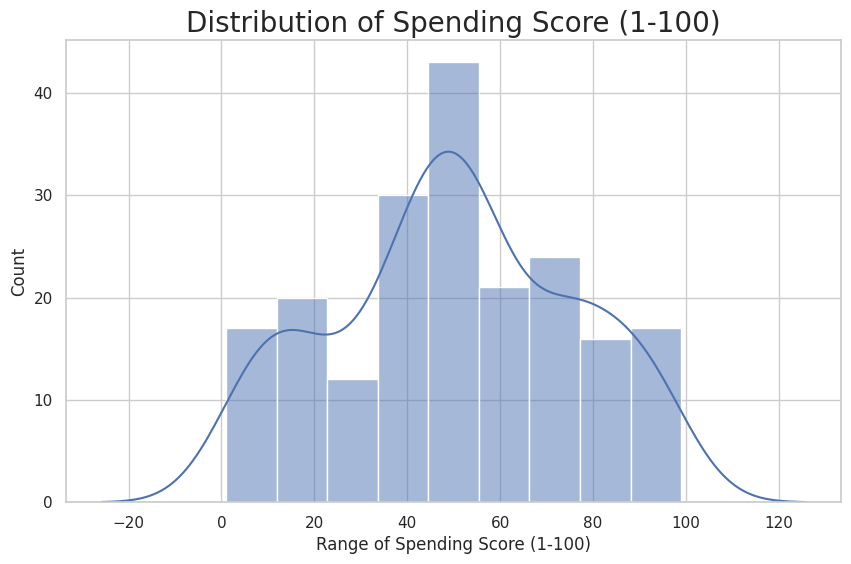

In [ ]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(data1['Spending Score (1-100)'],kde=True, kde_kws=dict(cut=3))
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')


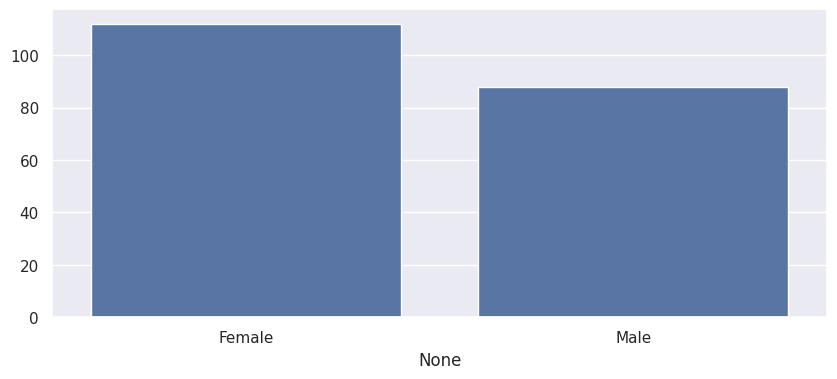

In [ ]:
# Gender analysis
genders = data1.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()


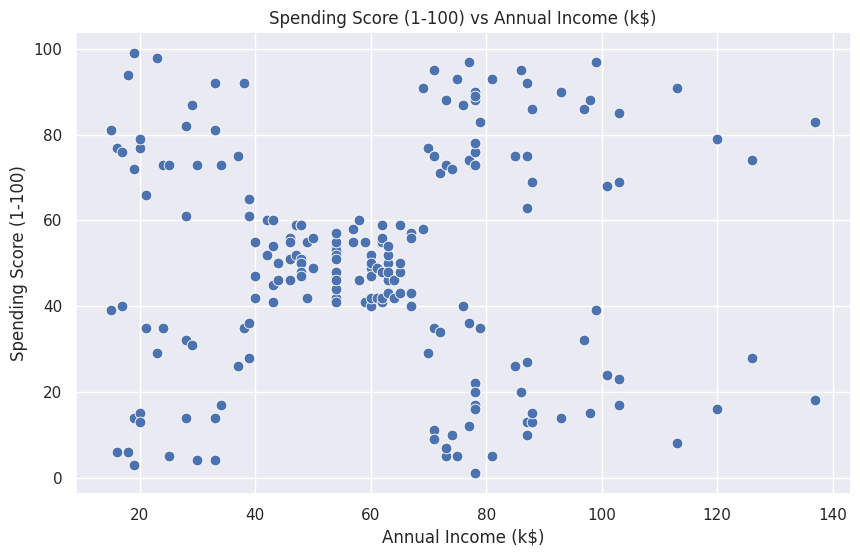

In [ ]:
#We take just the Annual Income and Spending score
df1=data1[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
#Scatterplot of Annual Income and Spending score
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


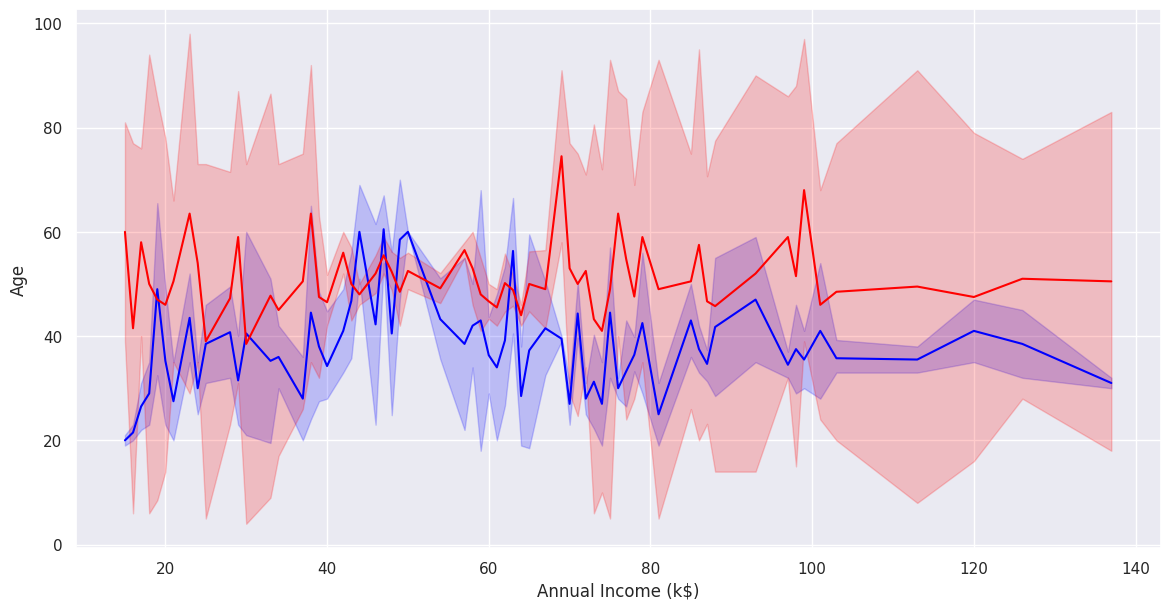

In [ ]:
plt.figure(figsize=(14,7))
# Group variable using "hue" that will produce lines with different colors
sns.lineplot(x="Annual Income (k$)" , y="Age",  color = 'blue',  data=data1)
sns.lineplot(x="Annual Income (k$)" , y="Spending Score (1-100)",  color = 'red',  data=data1)
plt.show()

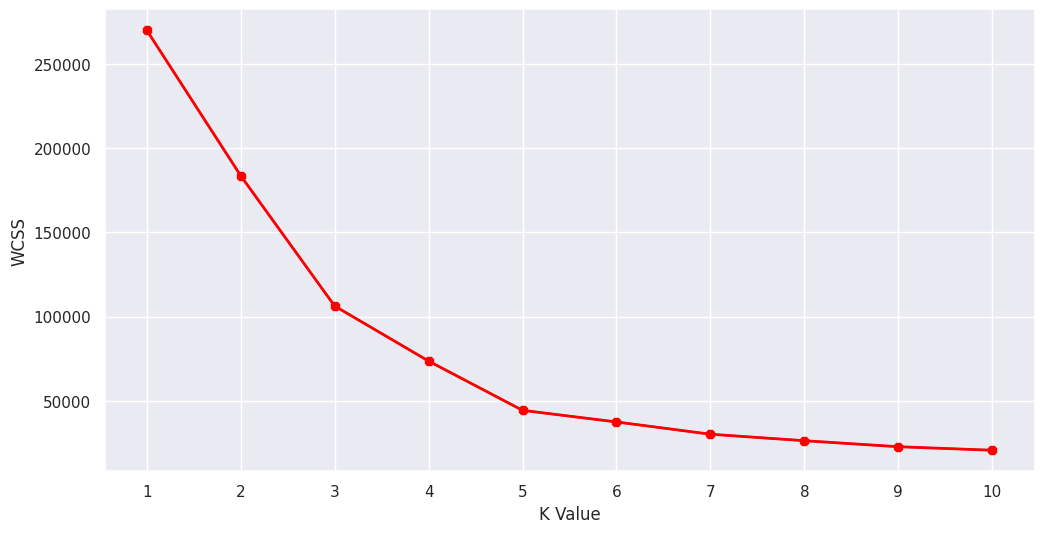

In [ ]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init='auto')
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5, n_init='auto')
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [ ]:
# find the size of each cluster
y_clust_sizes = df1.groupby('label').size().to_frame()
y_clust_sizes.columns = ["KMeans_size"]
y_clust_sizes


,KMeans_size
label,
0,81
1,22
2,39
3,35
4,23


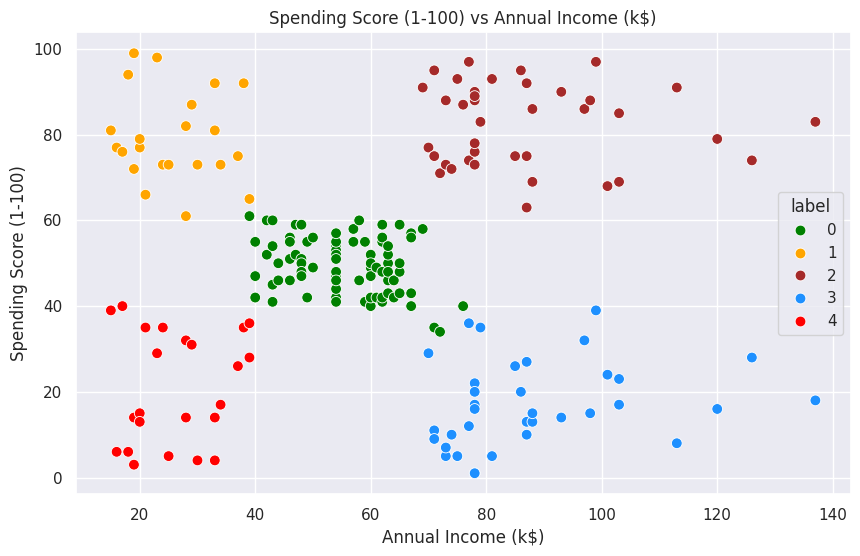

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [ ]:
import plotly.graph_objects as go


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['label'], y=df1['CustomerID'],
                    mode='markers',
                    marker_color=df1['CustomerID'],
                    marker_size=16,
                    text=df1['CustomerID'],
                    )),
fig.update_yaxes(nticks=3)
fig.update_xaxes(nticks=20)
fig.update_layout(
    title="Customer clusters",
    xaxis_title="Cluster",
    yaxis_title="CustomerID",
    legend_title="Legend Title",
    autosize=False,width=500,height=400,
    font=dict(
        size=15),
    plot_bgcolor='#DDCFF4'

)
fig.show()

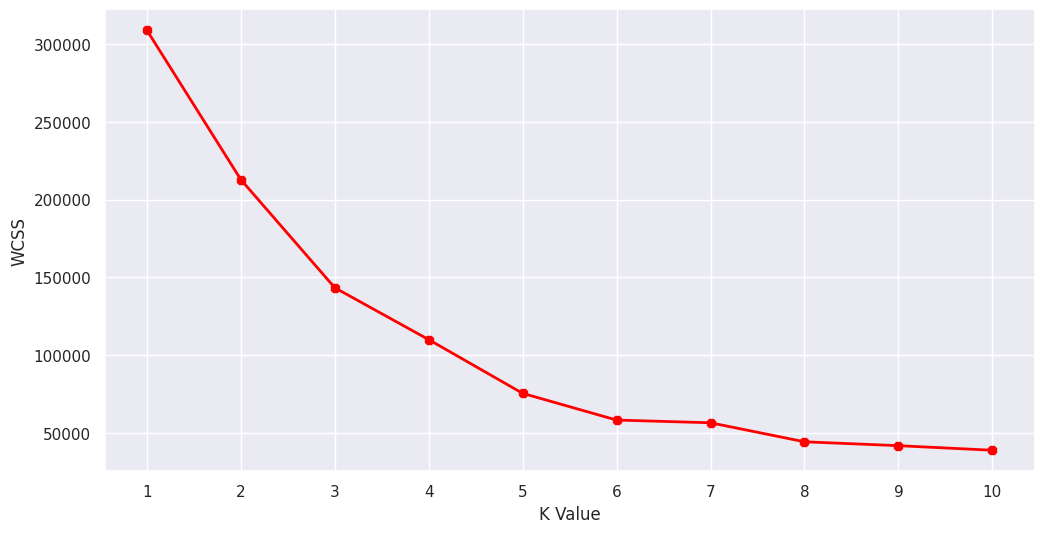

In [ ]:
#Taking the features
df=data1[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X2=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",n_init='auto')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


In [ ]:
#We choose the k for which WSS starts to diminish
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5,n_init='auto')
y2 = km2.fit_predict(X2)
df["label"] = y2
#The data with labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


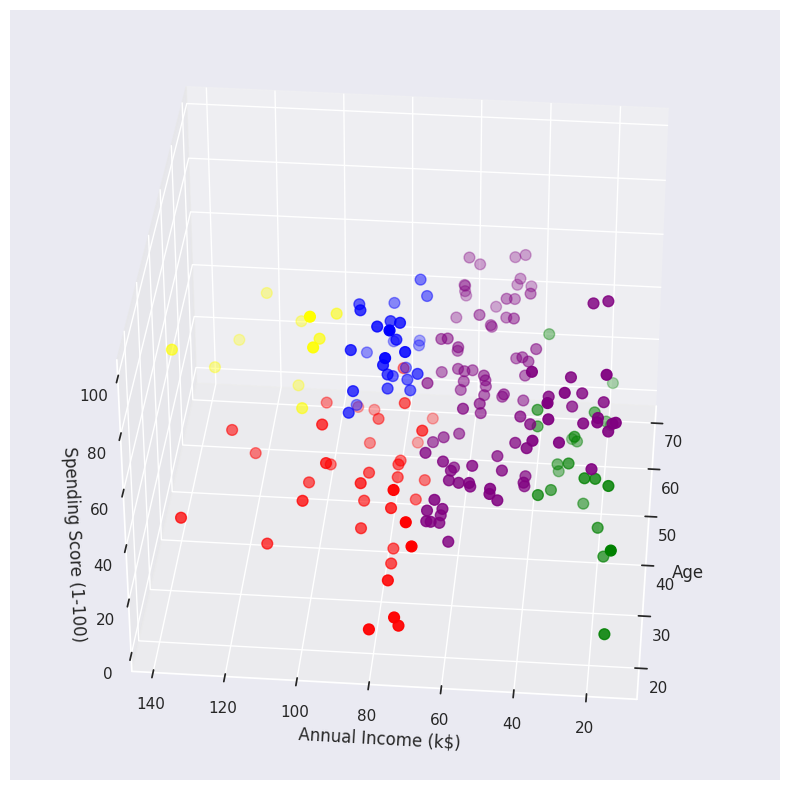

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='purple', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='green', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


In [ ]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")


Number of customer in 1st group= 38
They are - [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]
--------------------------------------------
Number of customer in 2nd group= 28
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------
Number of customer in 3rd group= 100
They are - [  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123]
--------------------------------------------
Number of customer in 4th group= 23
They are 

In [ ]:
#check the size of each cluster
y1_clust_sizes = df.groupby('label').size().to_frame()
y1_clust_sizes.columns = ["KMeans_size 3 Features"]
y1_clust_sizes

,KMeans_size 3 Features
label,
0,100
1,38
2,28
3,23
4,11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



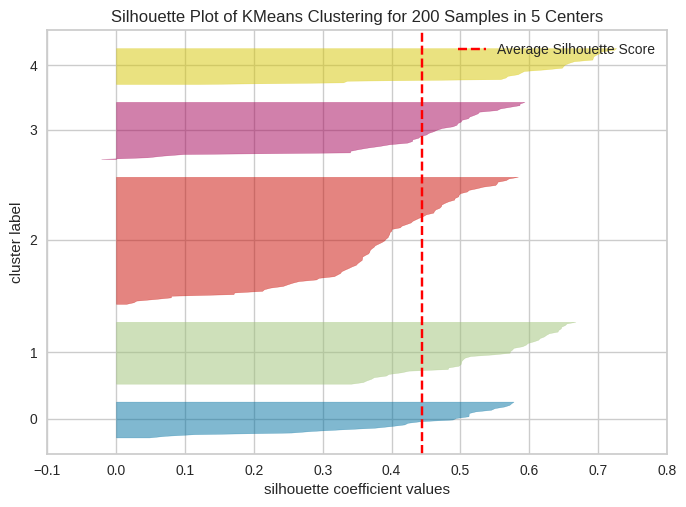

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X2)
visualizer.show()
plt.show()

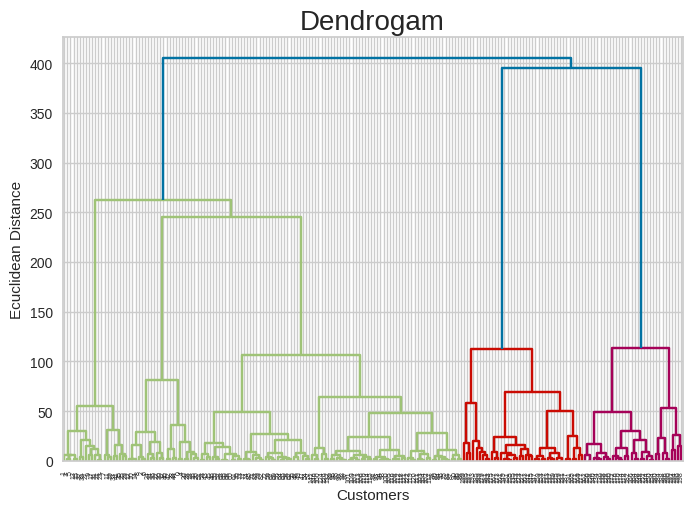

In [ ]:
#Hierarchical agglomerative clustering (HAC)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
df2=data1[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
df2["label"] = y_hc
df2


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


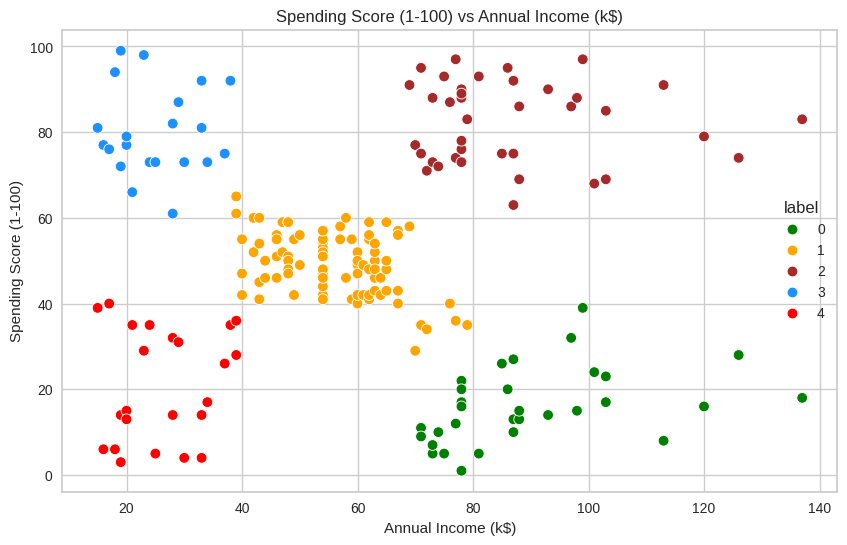

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df2  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [ ]:
cust6=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust6))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust7=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust7))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust8=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust8))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust9=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust9))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust10=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust10))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")


Number of customer in 1st group= 85
They are - [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]
--------------------------------------------
Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------
Number of customer in 3rd group= 32
They are - [  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123]
--------------------------------------------
Number of customer in 4th group= 21
They are -

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df1['label'], y=df1['CustomerID'],
                    mode='markers',
                    marker_color=df1['CustomerID'],
                    marker_size=16,
                    text=df1['CustomerID'],
                    )),
fig1.update_yaxes(nticks=3)
fig1.update_xaxes(nticks=20)
fig1.update_layout(
    title="Customer clusters",
    xaxis_title="Cluster",
    yaxis_title="CustomerID",
    legend_title="Legend Title",
    autosize=False,width=500,height=400,
    font=dict(
        size=15),
    plot_bgcolor='#DDCFF4'

)
fig1.show()

In [ ]:
# Check the size of the clusters
h_clust_sizes = df2.groupby('label').size().to_frame()
h_clust_sizes.columns = ["Hierarchical"]
h_clust_sizes

,Hierarchical
label,
0,32
1,85
2,39
3,21
4,23


In [ ]:
#Getting  reaady for DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [ ]:
X4=data1[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X4)
distances, indices = neighbors_fit.kneighbors(X4)

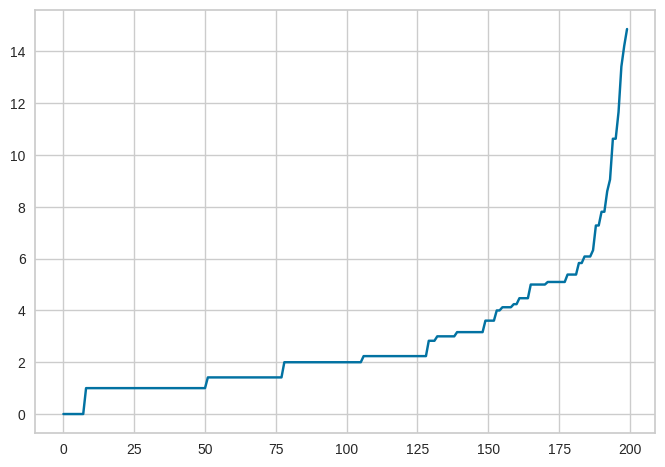

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
!pip install kneed
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)


10.63014581273465


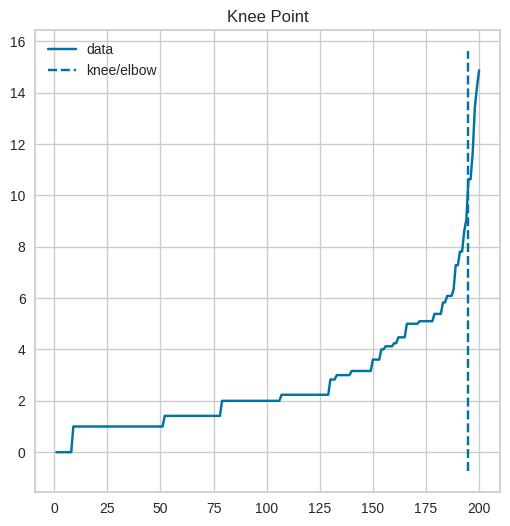

In [ ]:
kneedle.plot_knee()
plt.show()

<ipython-input-38-aaf08a943084>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



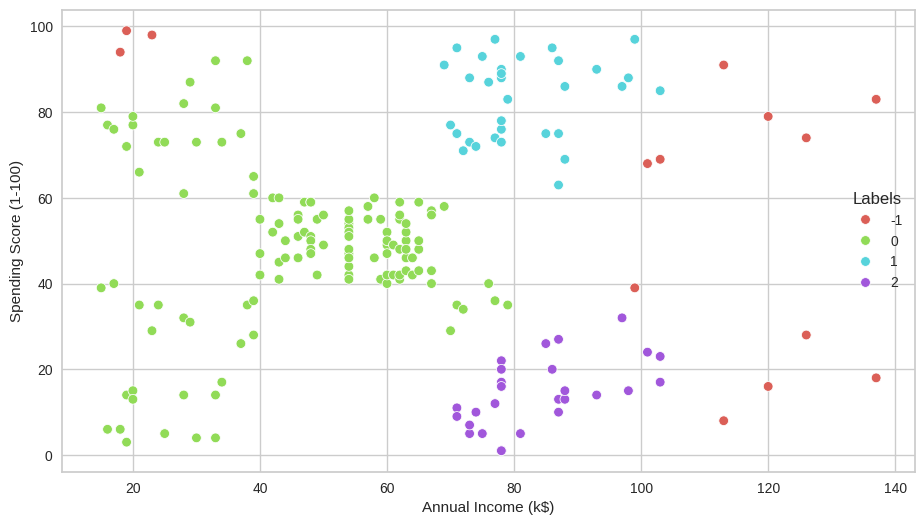

In [ ]:
# Run DBSCAN with epsilon 10.63, min samples 4
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=10.63, min_samples=4).fit(X4)

X4['Labels'] = db.labels_
plt.figure(figsize=(11, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data = X4, hue=X4.Labels,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
#plt.title('DBSCAN with epsilon 10.63, min samples 4')
plt.show()

In [ ]:
#Check the sixe of each cluster
DBSCAN_clust_sizes = X4.groupby('Labels').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Labels,
-1,14
0,126
1,33
2,27


In [ ]:
#Calculate the silhouette score
labels1=db.labels_
from sklearn import metrics
print(metrics.silhouette_score(X4, labels1))

0.39959199141739676


In [ ]:
# Compare the four attempts KMeans-2, KMeans3, HC, DBSCAN
clusters = pd.concat([y_clust_sizes, y1_clust_sizes, DBSCAN_clust_sizes, h_clust_sizes],axis=1, sort=False)
clusters

,KMeans_size,KMeans_size 3 Features,DBSCAN_size,Hierarchical
0,81.0,100.0,126.0,32.0
1,22.0,38.0,33.0,85.0
2,39.0,28.0,27.0,39.0
3,35.0,23.0,NaN,21.0
4,23.0,11.0,NaN,23.0
-1,NaN,NaN,14.0,NaN


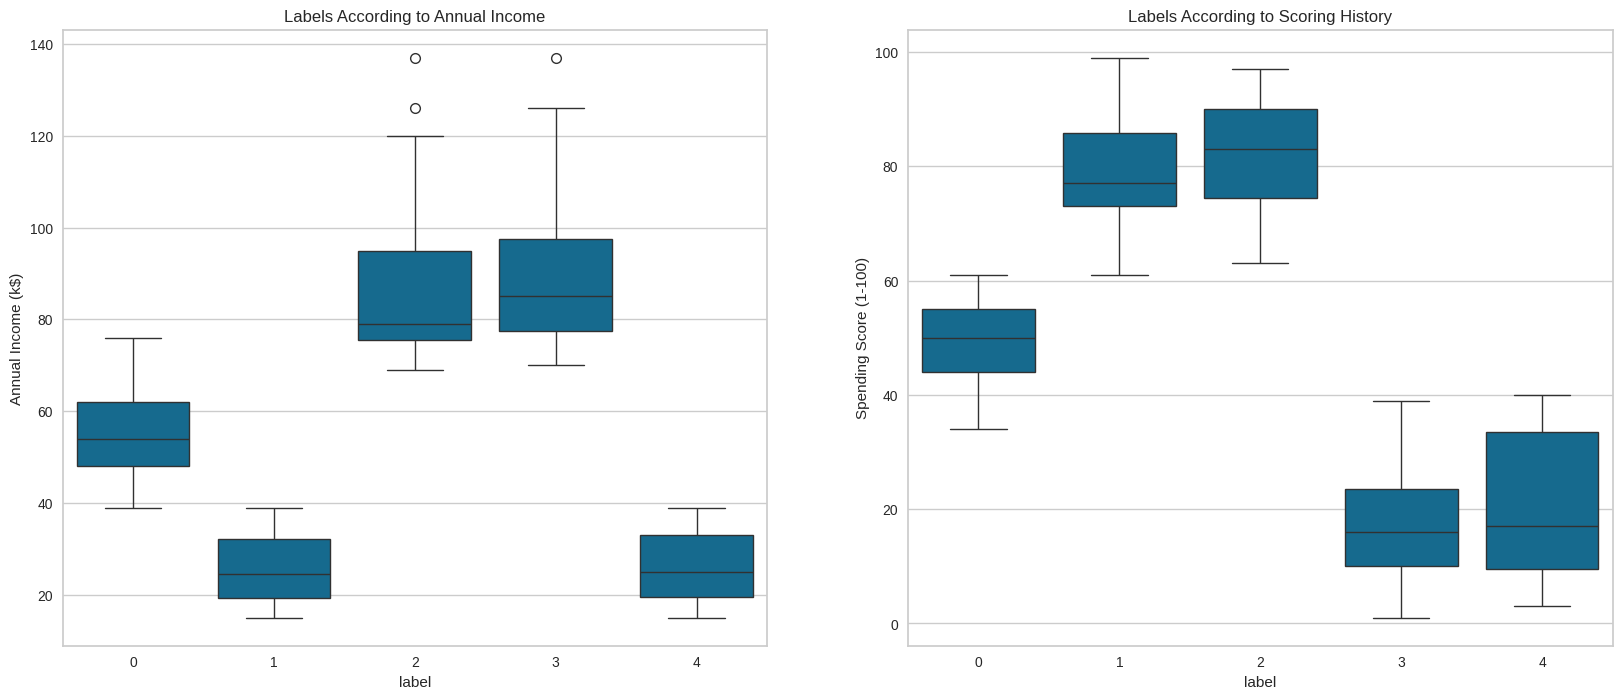

In [ ]:
# Compare the four attempts KMeans-2
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.boxplot(x='label', y='Annual Income (k$)', data=df1, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.boxplot(x='label', y='Spending Score (1-100)', data=df1, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()